In [1]:
import os
import itertools
import functools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

All experiment data are output to the data folder. We should only consider the Siren controller results since it is the computation time of the solver, we need to analyze

In [2]:
experiments = os.listdir('../data')


def extract_timings(path):
    timings = pd.read_csv(os.path.join('../data', path, 'timing.csv'), names=['seconds', 'execution_time'])
    timings['path'] = path
    
    return timings


experiments_mpc = list(filter(lambda path: 'timed' not in path, experiments))
timings = pd.concat(map(extract_timings, experiments_mpc), axis=0)
timings.head()

,seconds,execution_time,path
0,0,0.047032,aarhus_c_16_p_30
1,1,0.037717,aarhus_c_16_p_30
2,2,0.039361,aarhus_c_16_p_30
3,3,0.043056,aarhus_c_16_p_30
4,4,0.046305,aarhus_c_16_p_30


In [3]:
def extract_part_n(part, path):
    return int(path.split('_')[part])

timings['c'] = timings['path'].map(functools.partial(extract_part_n, 2))
timings['p'] = timings['path'].map(functools.partial(extract_part_n, 4))

timings.head()

,seconds,execution_time,path,c,p
0,0,0.047032,aarhus_c_16_p_30,16,30
1,1,0.037717,aarhus_c_16_p_30,16,30
2,2,0.039361,aarhus_c_16_p_30,16,30
3,3,0.043056,aarhus_c_16_p_30,16,30
4,4,0.046305,aarhus_c_16_p_30,16,30


In [4]:
variable_prediction_horizon = timings[timings['c'] == timings['p']].copy()
constant_prediction_horizon = timings[timings['p'] == 30].copy()

def extract_legend(prefix, path):
    parts = path.split('_')
    name = {
        'fourway': '4-way intersection',
        'aarhus': 'Aarhus intersection'
    }
    
    return prefix + name[parts[0]]

extract_variable_legend = functools.partial(extract_legend, 'Variable prediction horizon - ')
extract_constant_legend = functools.partial(extract_legend, 'Constant prediction horizon - ')

variable_prediction_horizon['legend'] = variable_prediction_horizon['path'].map(extract_variable_legend)
constant_prediction_horizon['legend'] = constant_prediction_horizon['path'].map(extract_constant_legend)

timings = pd.concat([variable_prediction_horizon, constant_prediction_horizon], axis=0)
timings.head()

,seconds,execution_time,path,c,p,legend
0,0,0.039168,aarhus_c_15_p_15,15,15,Variable prediction horizon - Aarhus intersection
1,1,0.031497,aarhus_c_15_p_15,15,15,Variable prediction horizon - Aarhus intersection
2,2,0.033904,aarhus_c_15_p_15,15,15,Variable prediction horizon - Aarhus intersection
3,3,0.033625,aarhus_c_15_p_15,15,15,Variable prediction horizon - Aarhus intersection
4,4,0.033958,aarhus_c_15_p_15,15,15,Variable prediction horizon - Aarhus intersection


As a sanity check for the correctness of these results, just check the summary statistics for the numeric columns

In [5]:
timings.describe()

,seconds,execution_time,c,p
count,230403.000000,230403.000000,230403.000000,230403.000000
mean,1799.523444,0.327946,22.499915,26.249867
std,1039.246242,0.340916,4.609813,4.968769
min,0.000000,0.008564,15.000000,15.000000
25%,900.000000,0.129180,18.000000,22.000000
50%,1800.000000,0.222964,22.000000,30.000000
75%,2700.000000,0.389254,26.000000,30.000000
max,3600.000000,5.755448,30.000000,30.000000


In [6]:
timings[timings['legend'] == 'Constant prediction horizon - Aarhus intersection'].describe()

,seconds,execution_time,c,p
count,57600.000000,57600.000000,57600.000000,57600.0
mean,1799.500000,0.542287,22.500000,30.0
std,1039.239466,0.428869,4.609812,0.0
min,0.000000,0.031592,15.000000,30.0
25%,899.750000,0.277214,18.750000,30.0
50%,1799.500000,0.401282,22.500000,30.0
75%,2699.250000,0.640430,26.250000,30.0
max,3599.000000,5.755448,30.000000,30.0


# Plotting

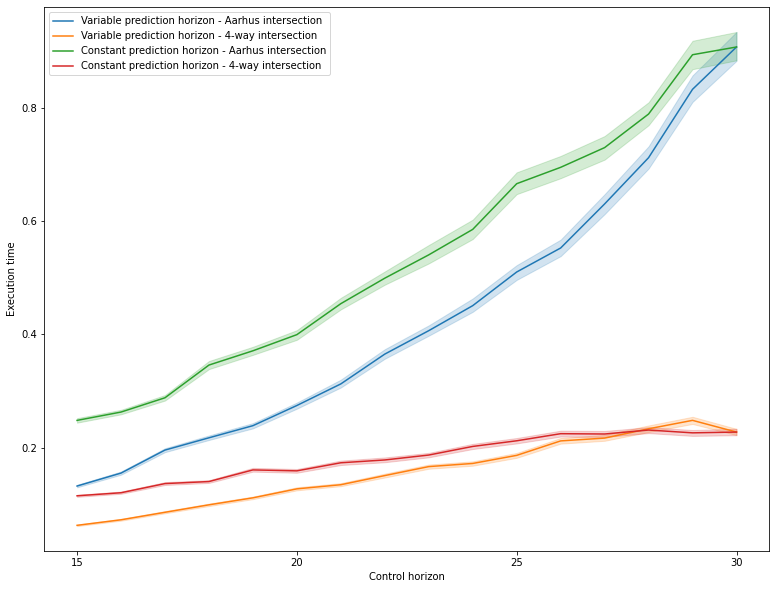

In [7]:
plt.figure(figsize=(13, 10))

sns.lineplot(x='c', y='execution_time', hue='legend', ci=99, data=timings)

plt.legend(loc='upper left')
plt.ylabel('Execution time')
plt.xlabel('Control horizon')
plt.xticks(np.arange(15, 31, 5))

plt.savefig('execution_time.pdf', format='pdf', bbox_inches='tight')